# Self Practice 3 - Construction & Documentation
___

## Material

### **Practice Material**

- [Data Understanding](#data-understanding)
- [Data Cleaning](#data-cleaning)
- [Constructing Data](#constructing-data)
- [Determining Data Labels](#determining-data-labels)
- [Data Visualization](#data-visualization)
- [Evaluation & Documentation](#evaluation--documentation)

### **Library Material**

- Pandas
- Scikit-Learn
- Matplotlib
- Seaborn

## Import Library

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import seaborn as sns

## Data Understanding

In [ ]:
# Load the iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Identify the amount of data
print("Amount of data:", df.shape[0])

Jumlah data: 150


In [ ]:
# Identify data types
print("\nData Types:")
print(df.dtypes)


Tipe data:
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int32
dtype: object


In [ ]:
# Identifikasi nilai yang hilang
print("\nNumber of missing values:")
print(df.isnull().sum())


Jumlah nilai yang hilang:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [ ]:
# Identify outliers (using IQR)
for column in df.columns[:-1]:  # Loop through numeric features
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
  print(f"\nOutliers in columns {column}:")
  print(outliers)


Outlier pada kolom sepal length (cm):
Empty DataFrame
Columns: [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm), target]
Index: []

Outlier pada kolom sepal width (cm):
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
15                5.7               4.4                1.5               0.4   
32                5.2               4.1                1.5               0.1   
33                5.5               4.2                1.4               0.2   
60                5.0               2.0                3.5               1.0   

    target  
15       0  
32       0  
33       0  
60       1  

Outlier pada kolom petal length (cm):
Empty DataFrame
Columns: [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm), target]
Index: []

Outlier pada kolom petal width (cm):
Empty DataFrame
Columns: [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm), target]
Index: []


In [ ]:
# Statistical description of data
print("\nStatistical description:")
print(df.describe())


Deskripsi statistik:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


## Data Cleaning

In [ ]:
# Load the iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Identify the amount of data
print("Jumlah data:", df.shape[0])

Jumlah data: 150


In [ ]:
# Identify data types
print("\nData types:")
print(df.dtypes)


Tipe data:
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int32
dtype: object


In [ ]:
# Identify missing values
print("\nNumber of missing values:")
print(df.isnull().sum())


Jumlah nilai yang hilang:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [ ]:
# Identify outliers (using IQR)
for column in df.columns[:-1]:  # Loop melalui fitur numerik
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
  print(f"\nOutlier in the column {column}:")
  print(outliers)


Outlier pada kolom sepal length (cm):
Empty DataFrame
Columns: [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm), target]
Index: []

Outlier pada kolom sepal width (cm):
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
15                5.7               4.4                1.5               0.4   
32                5.2               4.1                1.5               0.1   
33                5.5               4.2                1.4               0.2   
60                5.0               2.0                3.5               1.0   

    target  
15       0  
32       0  
33       0  
60       1  

Outlier pada kolom petal length (cm):
Empty DataFrame
Columns: [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm), target]
Index: []

Outlier pada kolom petal width (cm):
Empty DataFrame
Columns: [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm), target]
Index: []


In [ ]:
# Statistical description of data
print("\nStatistical description:")
print(df.describe())


Deskripsi statistik:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [ ]:
# Data cleaning
# 1. Filling in missing values (if any)
# In the iris dataset, there are no missing values, so this section can be skipped.
# However, if there are any, you can use:
# df[‘sepal length (cm)’].fillna(df[‘sepal length (cm)’].mean(), inplace=True) 
# df[‘sepal width (cm)’].fillna(df[‘sepal width (cm)’].median(), inplace=True)
# df[‘petal length (cm)’].fillna(df[‘petal length (cm)’].mode()[0], inplace=True)

# 2. Deleting rows with incorrect data (if any)
# In the iris dataset, there is no clearly incorrect data.
# However, if there is, you can use:
# df.drop(df[df[‘sepal length (cm)’] < 0].index, inplace=True)

# 3. Correcting outlier values
for column in df.columns[:-1]:
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df[column] = df[column].clip(lower_bound, upper_bound)

# After data cleansing
print("\nStatistical description after cleaning:")
print(df.describe())


Deskripsi statistik setelah pembersihan:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000         150.00000         150.000000   
mean            5.843333           3.05400           3.758000   
std             0.828066           0.42539           1.765298   
min             4.300000           2.05000           1.000000   
25%             5.100000           2.80000           1.600000   
50%             5.800000           3.00000           4.350000   
75%             6.400000           3.30000           5.100000   
max             7.900000           4.05000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


## Constructing Data

In [ ]:
# Load the iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# 1. Data normalization
# Normalization is performed using MinMaxScaler to convert the feature value range to 0-1.
scaler = MinMaxScaler()
numerical_features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
df[numerical_features] = scaler.fit_transform(df[numerical_features])
print("\nData after normalization:")
print(df.head())


Data setelah normalisasi:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0           0.222222          0.625000           0.067797          0.041667   
1           0.166667          0.416667           0.067797          0.041667   
2           0.111111          0.500000           0.050847          0.041667   
3           0.083333          0.458333           0.084746          0.041667   
4           0.194444          0.666667           0.067797          0.041667   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [ ]:
# 2. Feature selection
# Use SelectKBest to select the 2 best features based on the ANOVA F-value score.
X = df.drop('target', axis=1)
y = df['target']
selector = SelectKBest(score_func=f_classif, k=2)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("\nSelected feature:", selected_features)


Fitur terpilih: Index(['petal length (cm)', 'petal width (cm)'], dtype='object')


In [ ]:
# 3. Binning
# Binning is performed on the ‘petal length (cm)’ feature to group the data into several categories.
df['petal_length_binned'] = pd.cut(df['petal length (cm)'], bins=3, labels=['low', 'medium', 'high'])
print("\nData after binning:")
print(df.head())


Data setelah binning:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0           0.222222          0.625000           0.067797          0.041667   
1           0.166667          0.416667           0.067797          0.041667   
2           0.111111          0.500000           0.050847          0.041667   
3           0.083333          0.458333           0.084746          0.041667   
4           0.194444          0.666667           0.067797          0.041667   

   target petal_length_binned  
0       0              rendah  
1       0              rendah  
2       0              rendah  
3       0              rendah  
4       0              rendah  


## Determining Data Labels

In [ ]:
# Identify target data and perform labeling
# In the iris dataset, the ‘target’ column already represents class labels (0, 1, 2).
# However, if more specific labeling is required based on SOP,
# we can map labels according to our needs.

# For example, if the SOP specifies that:
# - target 0: Setosa
# - target 1: Versicolor
# - target 2: Virginica
# We can create a label mapping like this:

label_mapping = {
    0: 'Setosa',
    1: 'Versicolor',
    2: 'Virginica'
}

# Create a new column ‘target_label’ containing text labels
df['target_label'] = df['target'].map(label_mapping)

# Display data with new labels
print("\nData labeled according to SOP:")
print(df.head())


Data dengan label berdasarkan SOP:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0           0.222222          0.625000           0.067797          0.041667   
1           0.166667          0.416667           0.067797          0.041667   
2           0.111111          0.500000           0.050847          0.041667   
3           0.083333          0.458333           0.084746          0.041667   
4           0.194444          0.666667           0.067797          0.041667   

   target petal_length_binned target_label  
0       0              rendah       Setosa  
1       0              rendah       Setosa  
2       0              rendah       Setosa  
3       0              rendah       Setosa  
4       0              rendah       Setosa  


In [ ]:
# Load Iris Dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Data Identification
print("Amount of data:", df.shape[0])

Jumlah data: 150


In [ ]:
print("\nData types:")
print(df.dtypes)


Tipe data:
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int32
dtype: object


In [ ]:
print("\nNumber of missing values:")
print(df.isnull().sum())


Jumlah nilai yang hilang:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [ ]:
# Outlier Identification (IQR)
for column in df.columns[:-1]:  # Numerical features
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"\nOutliers in columns {column}:")
    print(outliers)


Outlier pada kolom sepal length (cm):
Empty DataFrame
Columns: [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm), target]
Index: []

Outlier pada kolom sepal width (cm):
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
15                5.7               4.4                1.5               0.4   
32                5.2               4.1                1.5               0.1   
33                5.5               4.2                1.4               0.2   
60                5.0               2.0                3.5               1.0   

    target  
15       0  
32       0  
33       0  
60       1  

Outlier pada kolom petal length (cm):
Empty DataFrame
Columns: [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm), target]
Index: []

Outlier pada kolom petal width (cm):
Empty DataFrame
Columns: [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm), target]
Index: []


In [ ]:
# Description of Statistics Before Cleaning
print("\nStatistical description:")
print(df.describe())


Deskripsi statistik:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [ ]:
# Data Cleaning

# 1. (Optional) Fill in missing values — not done because the data is complete

# 2. (Optional) Delete illogical data — not done because none was found

# 3. Correct outlier values with clipping
for column in df.columns[:-1]:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower_bound, upper_bound)

# Description of Statistics After Cleaning
print("\nStatistical description after cleaning:")
print(df.describe())


Deskripsi statistik setelah pembersihan:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000         150.00000         150.000000   
mean            5.843333           3.05400           3.758000   
std             0.828066           0.42539           1.765298   
min             4.300000           2.05000           1.000000   
25%             5.100000           2.80000           1.600000   
50%             5.800000           3.00000           4.350000   
75%             6.400000           3.30000           5.100000   
max             7.900000           4.05000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [ ]:
# Data Normalization
scaler = MinMaxScaler()
numerical_features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

print("\nData after normalization:")
print(df.head())


Data setelah normalisasi:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0           0.222222             0.725           0.067797          0.041667   
1           0.166667             0.475           0.067797          0.041667   
2           0.111111             0.575           0.050847          0.041667   
3           0.083333             0.525           0.084746          0.041667   
4           0.194444             0.775           0.067797          0.041667   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [ ]:
# Feature Selection
X = df.drop('target', axis=1)
y = df['target']
selector = SelectKBest(score_func=f_classif, k=2)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

print("\nSelected feature:", selected_features)


Fitur terpilih: Index(['petal length (cm)', 'petal width (cm)'], dtype='object')


In [ ]:
# Binning on 'petal length (cm)'
df['petal_length_binned'] = pd.cut(df['petal length (cm)'], bins=3, labels=['low', 'medium', 'high'])

print("\nData after binning:")
print(df.head())


Data setelah binning:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0           0.222222             0.725           0.067797          0.041667   
1           0.166667             0.475           0.067797          0.041667   
2           0.111111             0.575           0.050847          0.041667   
3           0.083333             0.525           0.084746          0.041667   
4           0.194444             0.775           0.067797          0.041667   

   target petal_length_binned  
0       0              rendah  
1       0              rendah  
2       0              rendah  
3       0              rendah  
4       0              rendah  


In [ ]:
# Mapping Target Labels
label_mapping = {
    0: 'Setosa',
    1: 'Versicolor',
    2: 'Virginica'
}
df['target_label'] = df['target'].map(label_mapping)

print("\nData labeled according to SOP:")
print(df.head())


Data dengan label berdasarkan SOP:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0           0.222222             0.725           0.067797          0.041667   
1           0.166667             0.475           0.067797          0.041667   
2           0.111111             0.575           0.050847          0.041667   
3           0.083333             0.525           0.084746          0.041667   
4           0.194444             0.775           0.067797          0.041667   

   target petal_length_binned target_label  
0       0              rendah       Setosa  
1       0              rendah       Setosa  
2       0              rendah       Setosa  
3       0              rendah       Setosa  
4       0              rendah       Setosa  


## Data Visualization

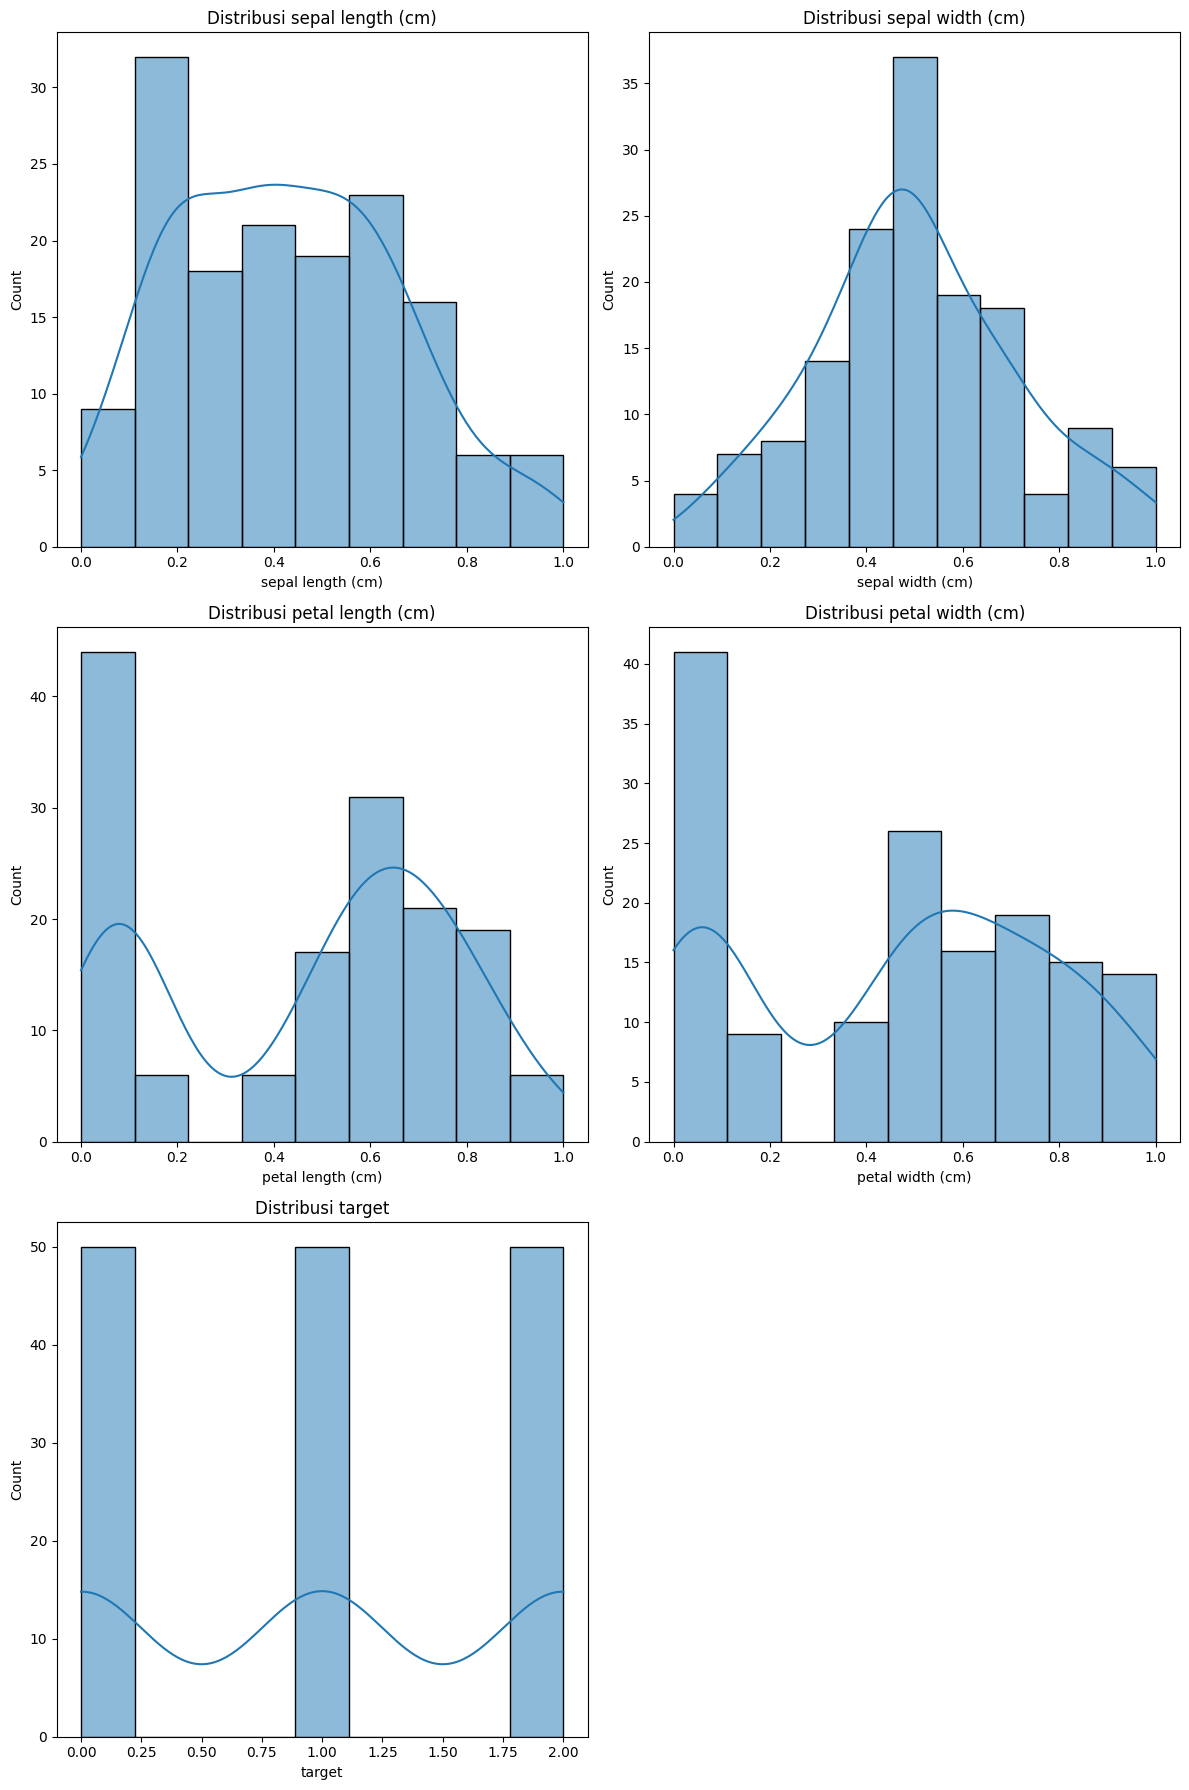

In [ ]:
# Histogram to view the distribution of data after cleaning
# Adjust the subplot grid to accommodate all columns
num_cols = len(df.columns[:-2])
num_rows = (num_cols + 1) // 2  # Calculate rows needed
plt.figure(figsize=(12, 6 * num_rows)) # Adjust figure height 

for i, column in enumerate(df.columns[:-2]):  # Loop through numeric features
  plt.subplot(num_rows, 2, i + 1)  # Use calculated rows and cols
  sns.histplot(df[column], kde=True)
  plt.title(f'Distribution {column}')
plt.tight_layout()
plt.show()

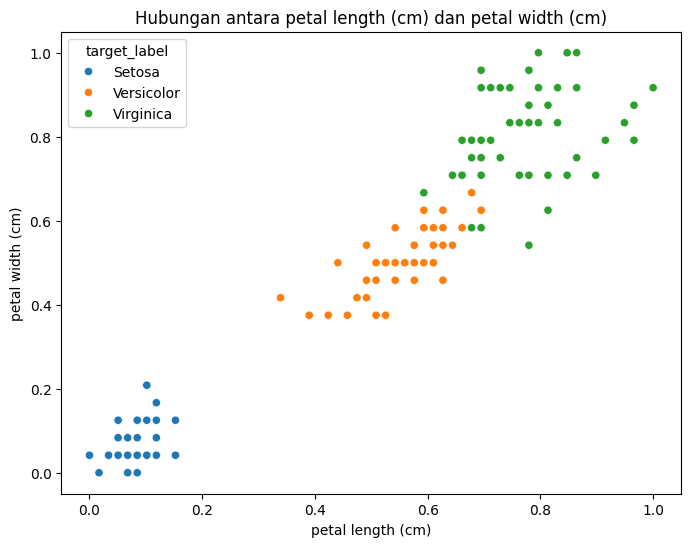

In [ ]:
# Scatter plot to see the relationship between two selected features
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df[selected_features[0]], y=df[selected_features[1]], hue=df['target_label'])
plt.title(f'The relationship between {selected_features[0]} and {selected_features[1]}')
plt.show()

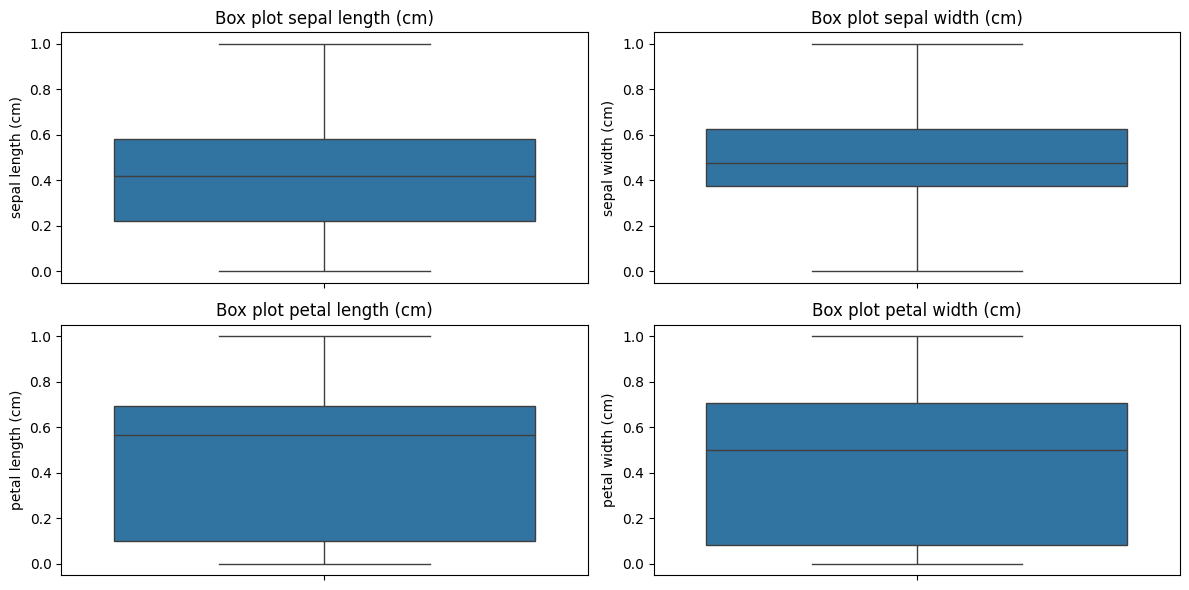

In [ ]:
# Box plot to see the distribution of data before and after normalization
plt.figure(figsize=(12, 6))
for i, column in enumerate(numerical_features):
  plt.subplot(2, 2, i + 1)
  sns.boxplot(data=df, y=column)
  plt.title(f'Box plot {column}')
plt.tight_layout()
plt.show()

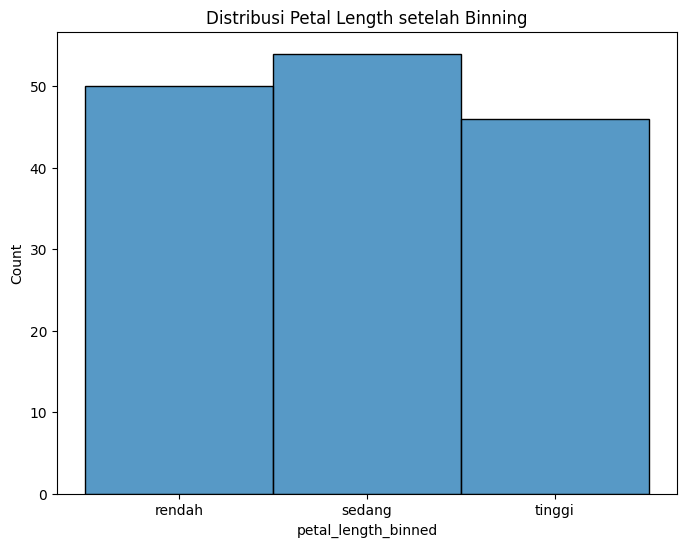

In [ ]:
# Histogram to view data distribution after binning
plt.figure(figsize=(8, 6))
sns.histplot(df['petal_length_binned'], kde=False)
plt.title('Petal Length Distribution after Binning')
plt.show()

In [ ]:
# Load Iris Dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Data Identification
print("Amount of Data:", df.shape[0])

Jumlah data: 150


In [ ]:
print("\nData types:")
print(df.dtypes)


Tipe data:
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int32
dtype: object


In [ ]:
print("\nNumber of missing values:")
print(df.isnull().sum())


Jumlah nilai yang hilang:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [34]:
# Identifikasi Outlier (IQR) 
for column in df.columns[:-1]:  # Fitur numerik
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"\nOutlier pada kolom {column}:")
    print(outliers)


Outlier pada kolom sepal length (cm):
Empty DataFrame
Columns: [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm), target]
Index: []

Outlier pada kolom sepal width (cm):
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
15                5.7               4.4                1.5               0.4   
32                5.2               4.1                1.5               0.1   
33                5.5               4.2                1.4               0.2   
60                5.0               2.0                3.5               1.0   

    target  
15       0  
32       0  
33       0  
60       1  

Outlier pada kolom petal length (cm):
Empty DataFrame
Columns: [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm), target]
Index: []

Outlier pada kolom petal width (cm):
Empty DataFrame
Columns: [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm), target]
Index: []


In [35]:
# Deskripsi Statistik Sebelum Pembersihan
print("\nDeskripsi statistik:")
print(df.describe())


Deskripsi statistik:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [36]:
# Pembersihan Data

# 1. (Opsional) Pengisian nilai yang hilang — tidak dilakukan karena data lengkap

# 2. (Opsional) Hapus data tidak logis — tidak dilakukan karena tidak ditemukan

# 3. Koreksi nilai outlier dengan clipping
for column in df.columns[:-1]:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower_bound, upper_bound)

# Deskripsi Statistik Setelah Pembersihan
print("\nDeskripsi statistik setelah pembersihan:")
print(df.describe())


Deskripsi statistik setelah pembersihan:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000         150.00000         150.000000   
mean            5.843333           3.05400           3.758000   
std             0.828066           0.42539           1.765298   
min             4.300000           2.05000           1.000000   
25%             5.100000           2.80000           1.600000   
50%             5.800000           3.00000           4.350000   
75%             6.400000           3.30000           5.100000   
max             7.900000           4.05000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [37]:
# Normalisasi Data
scaler = MinMaxScaler()
numerical_features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

print("\nData setelah normalisasi:")
print(df.head())


Data setelah normalisasi:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0           0.222222             0.725           0.067797          0.041667   
1           0.166667             0.475           0.067797          0.041667   
2           0.111111             0.575           0.050847          0.041667   
3           0.083333             0.525           0.084746          0.041667   
4           0.194444             0.775           0.067797          0.041667   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [38]:
# Pemilihan Fitur (Feature Selection) 
X = df.drop('target', axis=1)
y = df['target']
selector = SelectKBest(score_func=f_classif, k=2)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

print("\nFitur terpilih:", selected_features)


Fitur terpilih: Index(['petal length (cm)', 'petal width (cm)'], dtype='object')


In [39]:
# Binning pada 'petal length (cm)'
df['petal_length_binned'] = pd.cut(df['petal length (cm)'], bins=3, labels=['rendah', 'sedang', 'tinggi'])

print("\nData setelah binning:")
print(df.head())


Data setelah binning:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0           0.222222             0.725           0.067797          0.041667   
1           0.166667             0.475           0.067797          0.041667   
2           0.111111             0.575           0.050847          0.041667   
3           0.083333             0.525           0.084746          0.041667   
4           0.194444             0.775           0.067797          0.041667   

   target petal_length_binned  
0       0              rendah  
1       0              rendah  
2       0              rendah  
3       0              rendah  
4       0              rendah  


In [40]:
# Mapping Label Target
label_mapping = {
    0: 'Setosa',
    1: 'Versicolor',
    2: 'Virginica'
}
df['target_label'] = df['target'].map(label_mapping)

print("\nData dengan label berdasarkan SOP:")
print(df.head())


Data dengan label berdasarkan SOP:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0           0.222222             0.725           0.067797          0.041667   
1           0.166667             0.475           0.067797          0.041667   
2           0.111111             0.575           0.050847          0.041667   
3           0.083333             0.525           0.084746          0.041667   
4           0.194444             0.775           0.067797          0.041667   

   target petal_length_binned target_label  
0       0              rendah       Setosa  
1       0              rendah       Setosa  
2       0              rendah       Setosa  
3       0              rendah       Setosa  
4       0              rendah       Setosa  


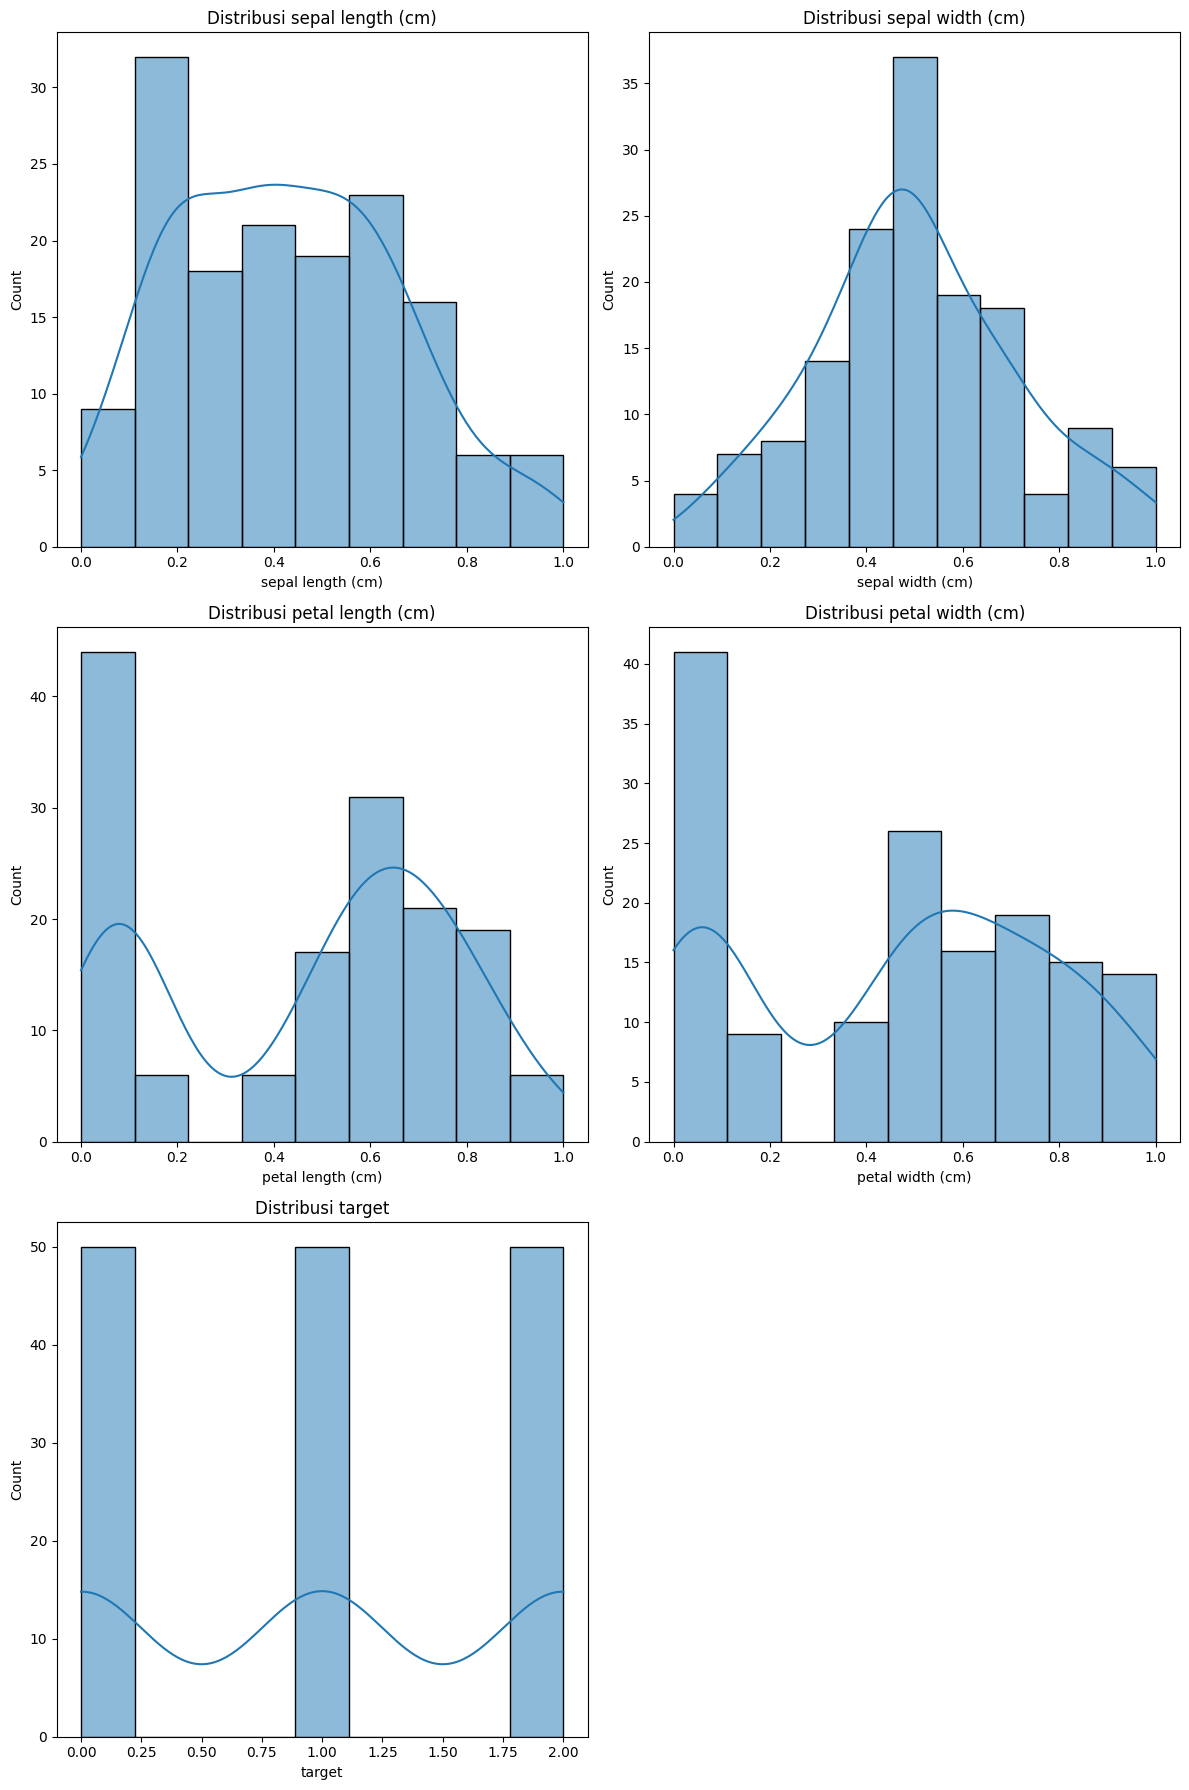

In [41]:
# Histogram untuk melihat distribusi data setelah pembersihan
# Adjust the subplot grid to accommodate all columns
num_cols = len(df.columns[:-2])
num_rows = (num_cols + 1) // 2  # Calculate rows needed
plt.figure(figsize=(12, 6 * num_rows)) # Adjust figure height 

for i, column in enumerate(df.columns[:-2]):  # Loop melalui fitur numerik
  plt.subplot(num_rows, 2, i + 1)  # Use calculated rows and cols
  sns.histplot(df[column], kde=True)
  plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

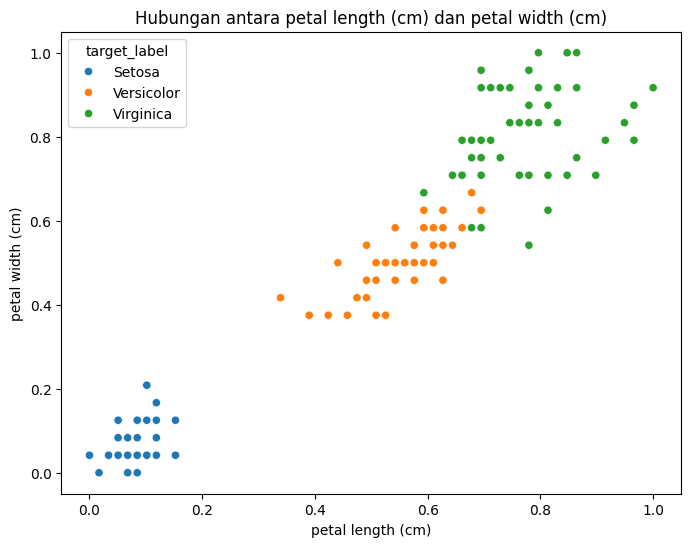

In [42]:
# Scatter plot untuk melihat hubungan antara dua fitur terpilih
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df[selected_features[0]], y=df[selected_features[1]], hue=df['target_label'])
plt.title(f'Hubungan antara {selected_features[0]} dan {selected_features[1]}')
plt.show()

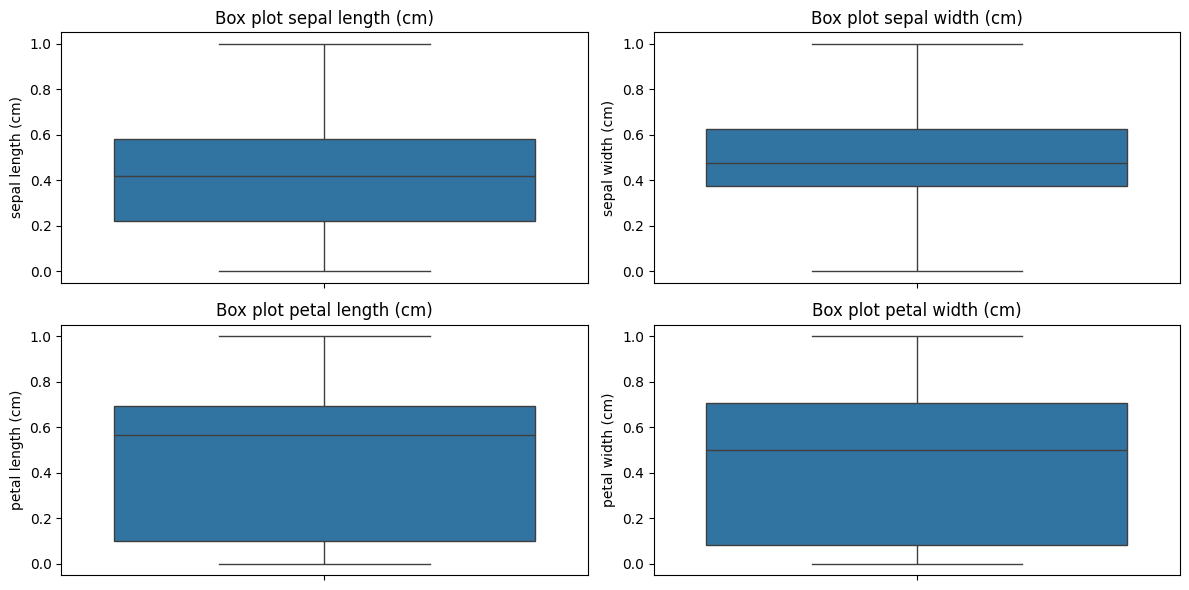

In [43]:
# Box plot untuk melihat distribusi data sebelum dan sesudah normalisasi
plt.figure(figsize=(12, 6))
for i, column in enumerate(numerical_features):
  plt.subplot(2, 2, i + 1)
  sns.boxplot(data=df, y=column)
  plt.title(f'Box plot {column}')
plt.tight_layout()
plt.show()

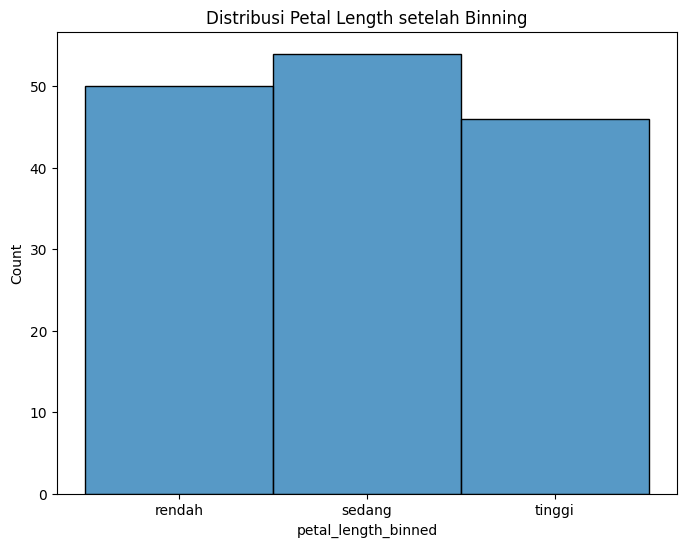

In [44]:
# Histogram untuk melihat distribusi data setelah binning
plt.figure(figsize=(8, 6))
sns.histplot(df['petal_length_binned'], kde=False)
plt.title('Distribusi Petal Length setelah Binning')
plt.show()

## Evaluation & Documentation

In [45]:
print("\nStatistik Deskriptif Data Setelah Pembersihan:")
print(df.describe())


Statistik Deskriptif Data Setelah Pembersihan:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            0.428704          0.502000           0.467458   
std             0.230018          0.212695           0.299203   
min             0.000000          0.000000           0.000000   
25%             0.222222          0.375000           0.101695   
50%             0.416667          0.475000           0.567797   
75%             0.583333          0.625000           0.694915   
max             1.000000          1.000000           1.000000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           0.458056    1.000000  
std            0.317599    0.819232  
min            0.000000    0.000000  
25%            0.083333    0.000000  
50%            0.500000    1.000000  
75%            0.708333    2.000000  
max            1.000000    2.000000  
